<a href="https://colab.research.google.com/github/shubh28012004/MOVIE_BOX_OFFICE_PREDICTION/blob/main/MOVIE_BOX_OFFICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOVIE BOX OFFICE REVENUE PREDICTION SYSTEM**

----
AIML B2

Shubh Agarwal - 22070126108

Sneh Patel - 2270126113

Shreyasee Shinde - 22070126106


----

# **INTRODUCTION**

This Project aims to give an idea of a real time business scenario based on EDA and DPL . As we know that Film production companies want to predict a movie's potential box office revenue based on pre-release information to optimize their marketing and distribution strategies. They seek to identify key factors that significantly influence a movie's box office performance.

-----
# BUSINESS UNDERSTANDING

We started building a prediction model which makes educated guess on a movie’s earnings. This project isn’t about numbers; its about decoding the magic behind top movies. We are not using Crystal balls, but magic of math and Machine Learning with a spice of storytelling.

Join us as we explore the world of  movies and data science, where we turn raw scraped data into a useful dataset with a prediction model. This is the story of predicting revenue, one at a time.


-----
# BUSINESS OBJECTIVE

**Predictive Accuracy:** Create a strong predictive model that can be used to forecast box office receipts for films with precision, assisting producers in making the best decisions.

**Key Factor Identification:** Assist production businesses in customising their strategy, identify the crucial elements that greatly impact a film's box office performance.



**Enrichment of the Audience:** Give film buffs insightful information about the business to help them develop a greater appreciation and understanding of the film industry.

**User-Friendly Interface:** Provide a user-friendly interface that allows both experts and amateurs to access and interact with the prediction model.

**Continuous Improvement:** Add additional data sources for increased accuracy and update and improve the model on a regular basis to accommodate the changing needs of the film business.

Our goal is to provide a complete, approachable solution that connects the two worlds.

-----


# **GETTING NOTEBOOK READY**



Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Supressing Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

Reading and understanding the Data

Importing the dataset

In [3]:
df = pd.read_csv("/content/movies (2).csv")

In [4]:
df.head()


,Name_of_movie,Year_of_release,Watchtime,Movie_Rating,Metascore,Votes,Grosses,Description,Director,Stars,Genres
0,The Shawshank Redemption,1994,142,9.3,82,"2,811,733",$28.34M,"Over the course of several years, two convicts...",Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",\nDrama
1,The Godfather,1972,175,9.2,100,"1,959,532",$134.97M,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...","\nCrime, Drama"
2,The Dark Knight,2008,152,9.0,84,"2,793,415",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","\nAction, Crime, Drama"
3,Schindler's List,1993,195,9.0,95,"1,413,454",$96.90M,"In German-occupied Poland during World War II,...",Steven Spielberg,"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...","\nBiography, Drama, History"
4,The Lord of the Rings: The Return of the King,2003,201,9.0,94,"1,925,087",$377.85M,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...","\nAction, Adventure, Drama"


In [5]:
df.tail()

,Name_of_movie,Year_of_release,Watchtime,Movie_Rating,Metascore,Votes,Grosses,Description,Director,Stars,Genres
995,The Taking of Pelham One Two Three,1974,104,7.6,68,"33,842",$2.49M,Four armed men hijack a New York City subway c...,Joseph Sargent,"['Walter Matthau', 'Robert Shaw', 'Martin Bals...","\nAction, Crime, Thriller"
996,Control,2007,122,7.6,78,"67,709",$0.87M,"A profile of Ian Curtis, the enigmatic singer ...",Anton Corbijn,"['Sam Riley', 'Samantha Morton', 'Craig Parkin...","\nBiography, Drama, Music"
997,A Very Long Engagement,2004,133,7.6,76,"75,297",$6.17M,Tells the story of a young woman's relentless ...,Jean-Pierre Jeunet,"['Audrey Tautou', 'Gaspard Ulliel', 'Jodie Fos...","\nDrama, Mystery, Romance"
998,Shine,1996,105,7.6,87,"55,905",$35.81M,"Pianist David Helfgott, driven by his father a...",Scott Hicks,"['Geoffrey Rush', 'Armin Mueller-Stahl', 'Just...","\nBiography, Drama, Music"
999,Cell 211,2009,113,7.6,,"69,845",,The story of two men on different sides of a p...,Daniel Monzón,"['Luis Tosar', 'Alberto Ammann', 'Antonio Resi...","\nAction, Crime, Drama"



Inspecting the dataframes


In [6]:
df.shape

(1000, 11)

Now as we can see in genre column at the beginning of each data there is '\n' therefore we have to strip the column.

In [7]:
df['Genres'] = df['Genres'].str.strip('\n')

In [8]:
df.head()

,Name_of_movie,Year_of_release,Watchtime,Movie_Rating,Metascore,Votes,Grosses,Description,Director,Stars,Genres
0,The Shawshank Redemption,1994,142,9.3,82,"2,811,733",$28.34M,"Over the course of several years, two convicts...",Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Drama
1,The Godfather,1972,175,9.2,100,"1,959,532",$134.97M,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...","Crime, Drama"
2,The Dark Knight,2008,152,9.0,84,"2,793,415",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","Action, Crime, Drama"
3,Schindler's List,1993,195,9.0,95,"1,413,454",$96.90M,"In German-occupied Poland during World War II,...",Steven Spielberg,"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...","Biography, Drama, History"
4,The Lord of the Rings: The Return of the King,2003,201,9.0,94,"1,925,087",$377.85M,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...","Action, Adventure, Drama"


In order to know more details about our dataset we performed .info()

In [9]:
df.info() # from this we can know about our datatype of columns as well as the memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name_of_movie    1000 non-null   object 
 1   Year_of_release  1000 non-null   object 
 2   Watchtime        1000 non-null   int64  
 3   Movie_Rating     1000 non-null   float64
 4   Metascore        1000 non-null   object 
 5   Votes            1000 non-null   object 
 6   Grosses          1000 non-null   object 
 7   Description      1000 non-null   object 
 8   Director         1000 non-null   object 
 9   Stars            1000 non-null   object 
 10  Genres           1000 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 86.1+ KB


Here we can see that are no null values  but in this dataset there are some columns like year_of_release , Metascore , Votes , Grosses which were extracted as object datatype during scrapping due to which empty strings('') was considered as data so there we no null Values . So we need to convert the required columns to their respective datatype.

---
# **DATA CLEANING AND MANIPULATION**

---

Now we have to convert numerical attributes like year_of_release , Metascore , Votes , Grosses to their specified datatype which were considered as object datatype.

In [10]:
import re

# Clean and extract the numeric part from 'Year_of_release' using regular expressions
df['Year_of_release'] = df['Year_of_release'].str.extract('(\d+)').astype(float).astype('Int64')
# This code will extract the numeric part and handle missing values with 'Int64' data type

In [11]:
# Replace non-numeric and empty string values with NaN
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')

# Convert the column to an integer data type, handling NaN values
df['Metascore'] = df['Metascore'].astype(pd.Int64Dtype())


In [12]:
# Clean the 'Votes' column by removing non-numeric characters and leading/trailing spaces
df['Votes'] = df['Votes'].str.replace(r'[^0-9]', '', regex=True).str.strip()

# Convert the cleaned column to integer
df['Votes'] = df['Votes'].astype(int)

In [13]:
# Remove non-numeric characters (e.g., currency symbols, commas, and other non-numeric characters) from the 'Grosses' column
df['Grosses'] = df['Grosses'].str.replace(r'[^0-9.]', '', regex=True)

# Replace empty strings with NaN
df['Grosses'] = df['Grosses'].replace('', np.nan)

# Convert the column to float to handle NaN values
df['Grosses'] = df['Grosses'].astype(float)


We again performed .info() to confirm that the datatypes have been changed succesfully

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name_of_movie    1000 non-null   object 
 1   Year_of_release  1000 non-null   Int64  
 2   Watchtime        1000 non-null   int64  
 3   Movie_Rating     1000 non-null   float64
 4   Metascore        845 non-null    Int64  
 5   Votes            1000 non-null   int64  
 6   Grosses          833 non-null    float64
 7   Description      1000 non-null   object 
 8   Director         1000 non-null   object 
 9   Stars            1000 non-null   object 
 10  Genres           1000 non-null   object 
dtypes: Int64(2), float64(2), int64(2), object(5)
memory usage: 88.0+ KB


After converting the required columns into int / float datatype we found some null values

**Checking for Null Values**

In [15]:
df.isnull().sum()

Name_of_movie        0
Year_of_release      0
Watchtime            0
Movie_Rating         0
Metascore          155
Votes                0
Grosses            167
Description          0
Director             0
Stars                0
Genres               0
dtype: int64

It shows we have null values in Metascore as well as Grosses


<Axes: >

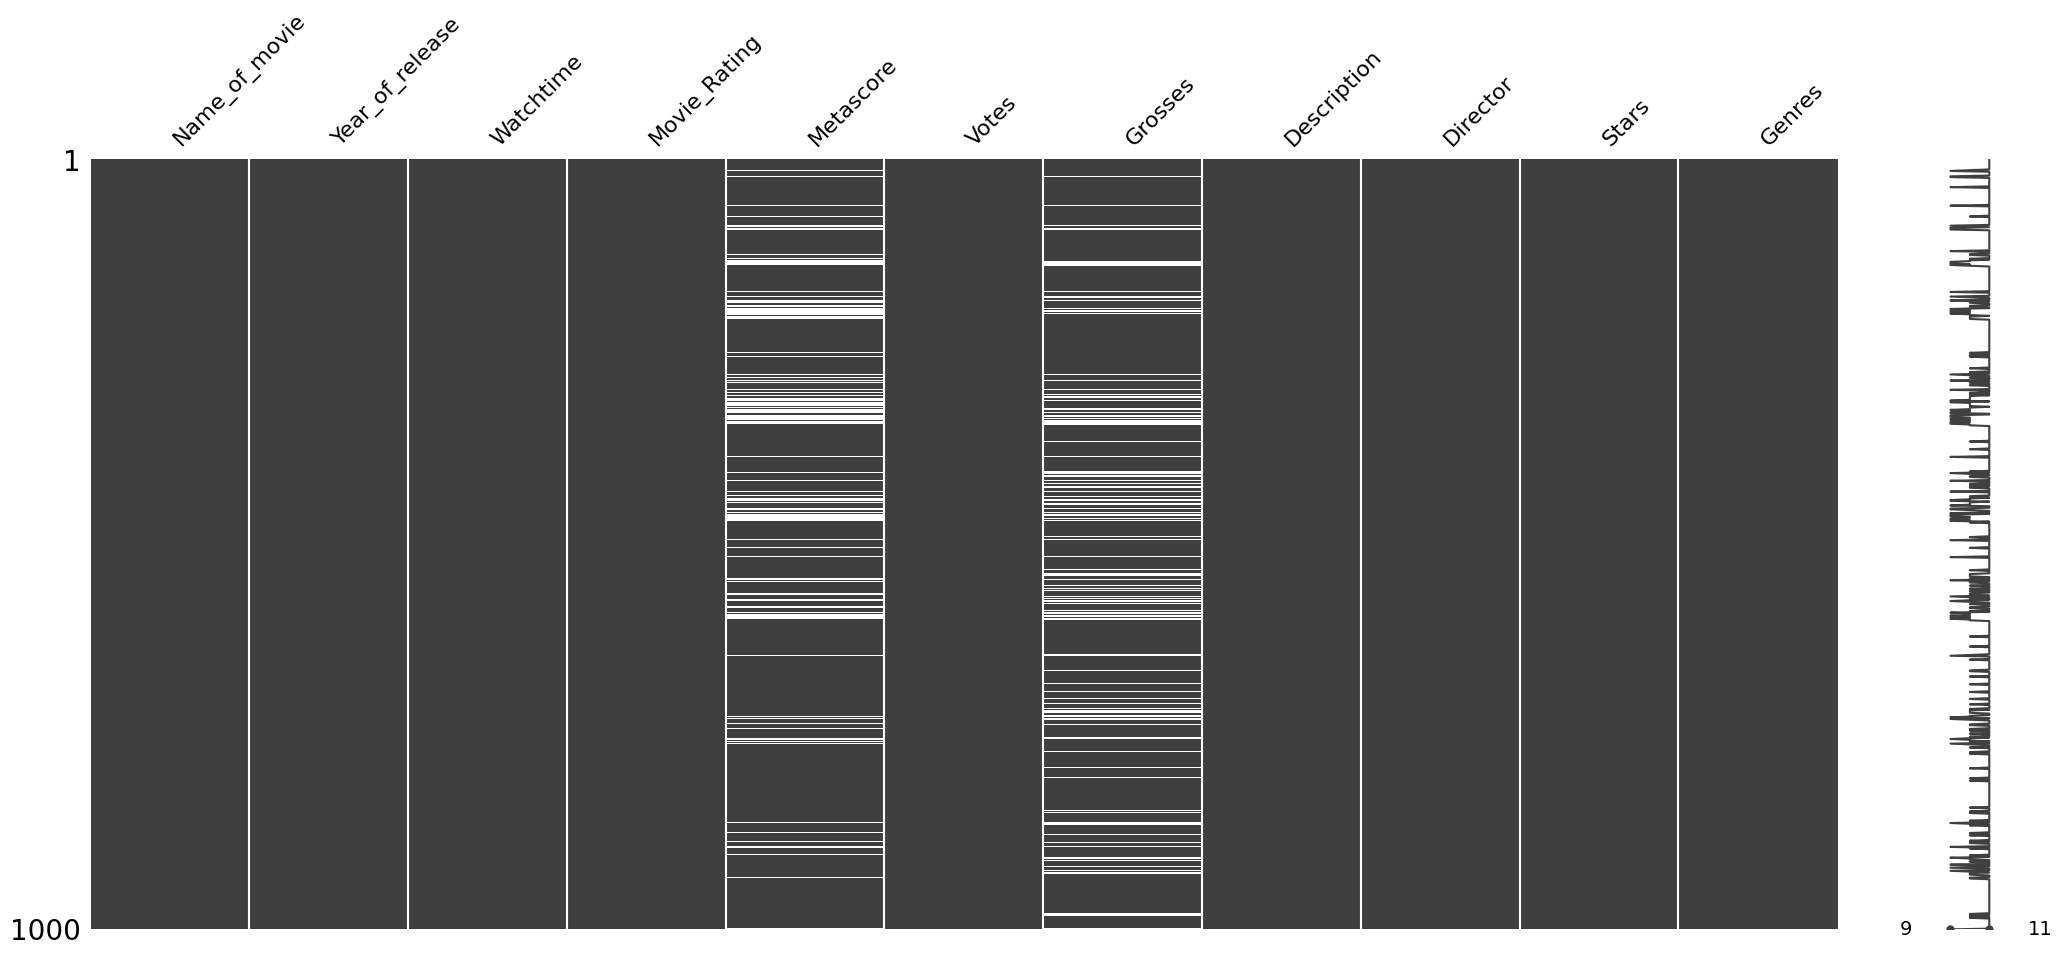

In [16]:
import missingno as mn
mn.matrix(df)

Matrix plot also shows that there are missing values , distributed accross the metascore and grosses column

**Removing Missing Values**

We are going to fill the values of both 'Grosses' and 'Metascore' respectively. So lets decide the imputation technique whether we should use mean / median.

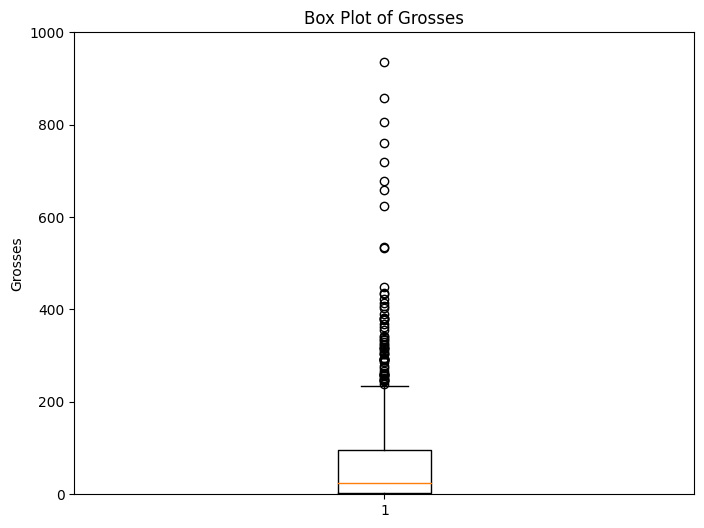

In [17]:
# Remove rows with missing 'Grosses' values
df_cleaned_grosses = df.dropna(subset=['Grosses'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned_grosses['Grosses'])
plt.title('Box Plot of Grosses')
plt.ylabel('Grosses')
plt.ylim(0,1000)
plt.show()

As the outliers present in grosses are spiking the mean so we are going to use median as an imputation as it is robust and does not get affected by Outliers

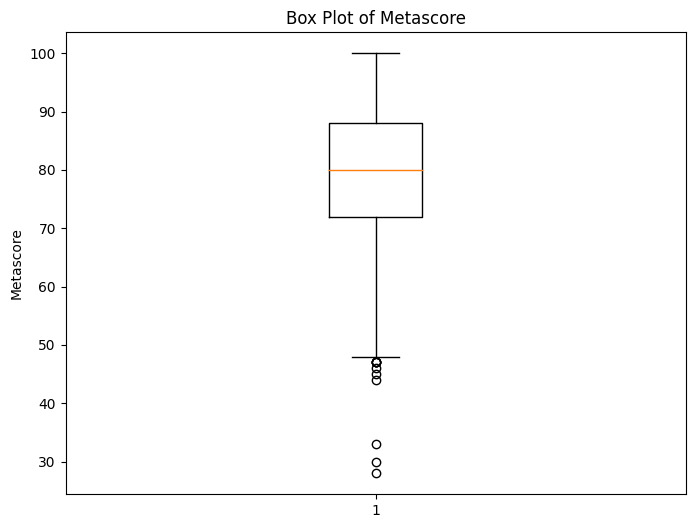

In [18]:

# Remove rows with missing 'Metascore' values
df_cleaned = df.dropna(subset=['Metascore'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['Metascore'])
plt.title('Box Plot of Metascore')
plt.ylabel('Metascore')
plt.show()

There are less no. of Outliers in Metascore so we can use the technique of mean for filling up the Null Values

In [19]:
median_Grosses = df['Grosses'].median()
median_Grosses


25.44

In [20]:
mean_Metascore = df['Metascore'].mean()
mean_Metascore

79.08165680473373

In [21]:
# Change the data type of 'Metascore' to float
df['Metascore'] = df['Metascore'].astype(float)

# Replace NaN values in 'Metascore' with the mean of 'Metascore'
df['Metascore'].fillna(mean_Metascore, inplace=True)


In [22]:
# Replace NaN values in 'Grosses' with the median of 'Grosses'
df['Grosses'].fillna(median_Grosses, inplace=True)

<Axes: >

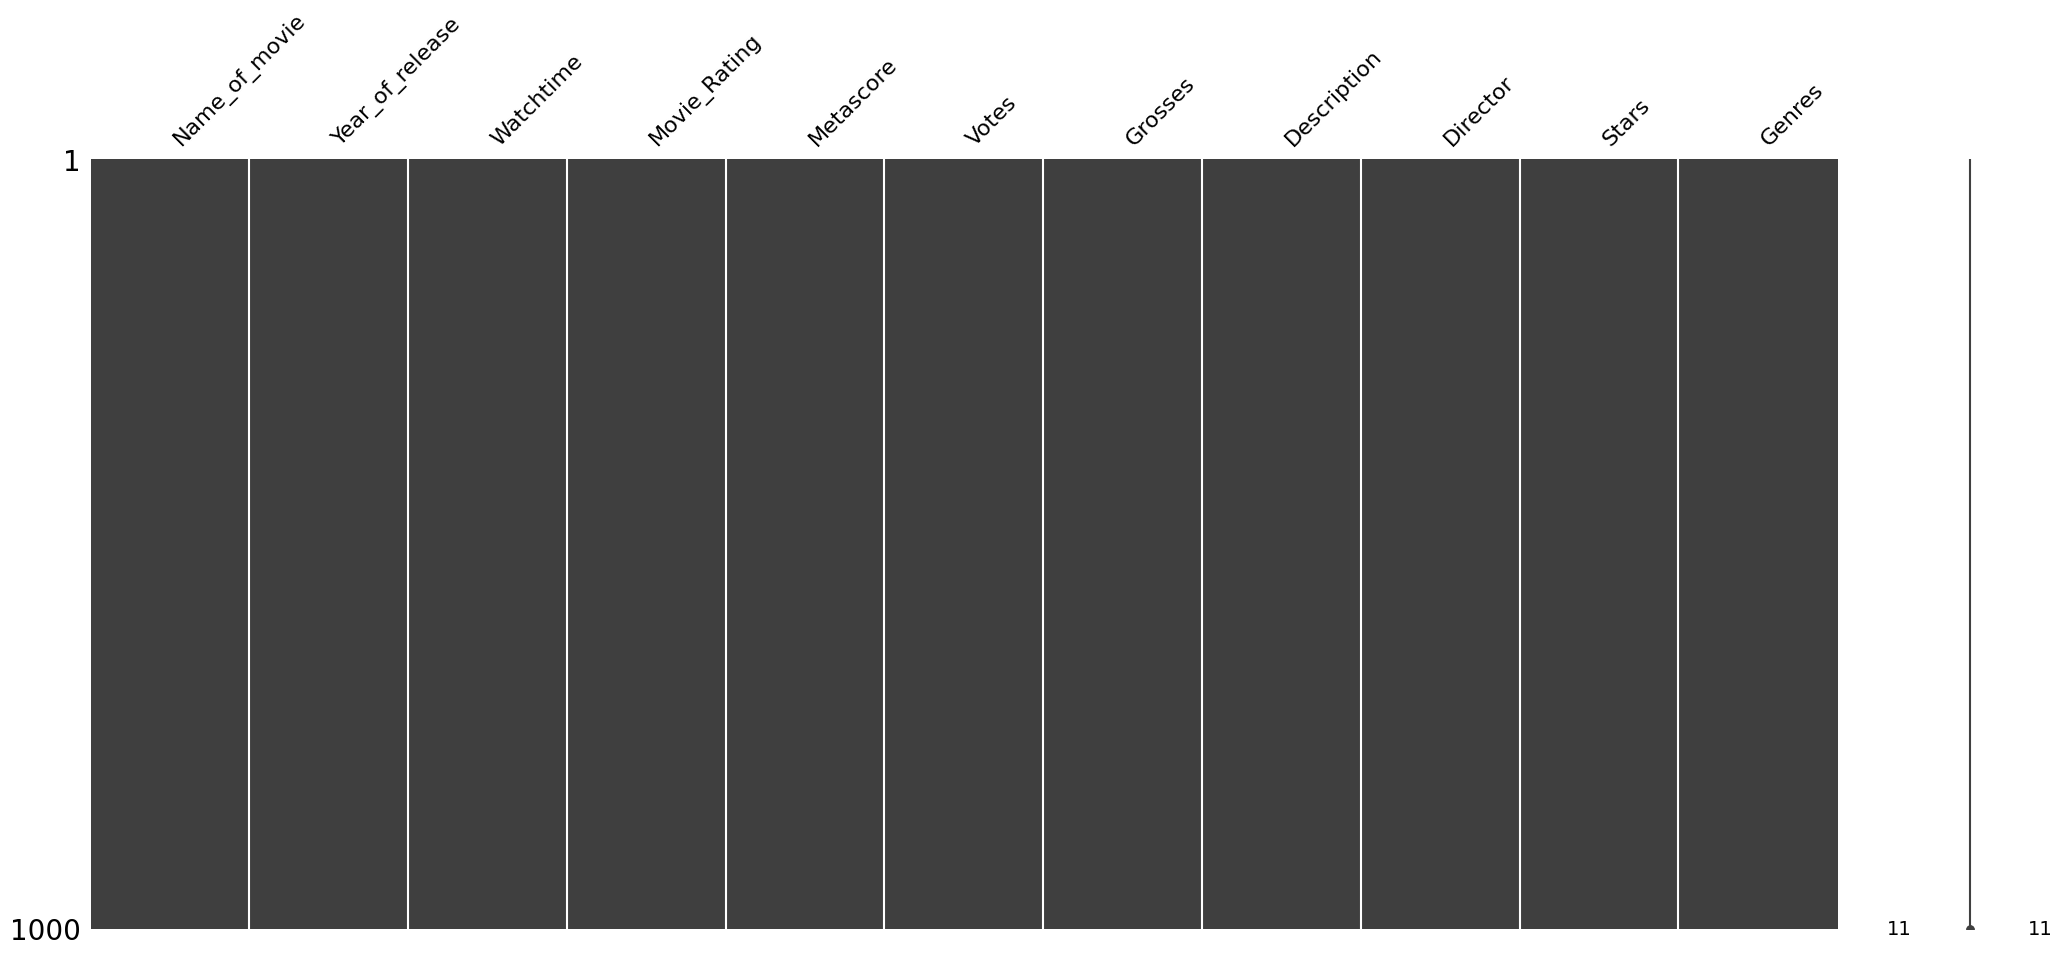

In [23]:
mn.matrix(df)

All the Null Values has been Removed

We want to see the statiscal values of the numerical columns of our datsaet

In [24]:
df.describe()

,Year_of_release,Watchtime,Movie_Rating,Metascore,Votes,Grosses
count,1000.0,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,1991.692,124.193000,7.970200,79.081657,3.225762e+05,65.002070
std,24.211223,28.810168,0.273947,11.007112,3.924434e+05,106.619892
min,1920.0,45.000000,7.600000,28.000000,2.565900e+04,0.000000
25%,1975.0,103.000000,7.800000,73.000000,6.180125e+04,5.017500
50%,1999.0,120.000000,7.900000,79.081657,1.580785e+05,25.440000
75%,2011.0,139.000000,8.100000,86.000000,4.508938e+05,70.532500
max,2023.0,321.000000,9.300000,100.000000,2.811733e+06,936.660000


**Analyzing & Deleting Unnecessary Columns present in our dataset**

First analyzing our numerical columns , for that we can use Heat map which will tell the correlation between two variables . It will allow us to know that which varibale is affected by the another variable.

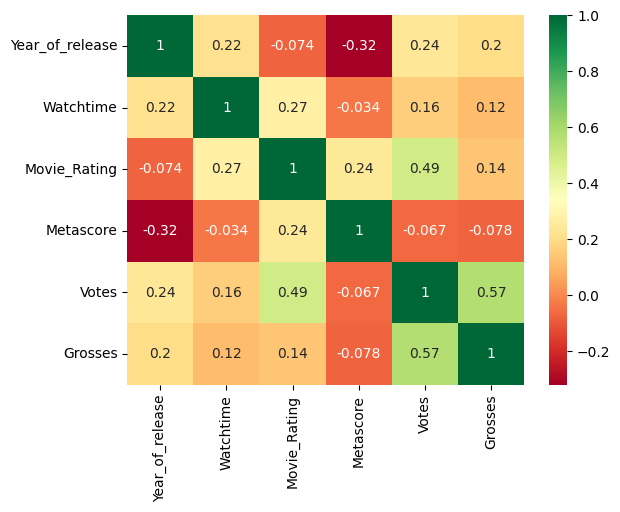

In [25]:
#HEAT MAP

# Taking numerical columns
num_col = df[["Year_of_release" , "Watchtime" , "Movie_Rating" , "Metascore" , "Votes" , "Grosses" , ]]
num_col = num_col.corr()
ax = sns.heatmap(num_col,
            xticklabels=num_col.columns,
            yticklabels=num_col.columns,
            annot = True,
            cmap ="RdYlGn")

**Inference**

We can see from this Heat Map:  

*  Also there is strong correlation of 0.49 between Movie_Rating and Votes.


*  And the highest positive correlation of 0.57 between Grosses and Votes.


*  As we can see watchtime has very week correlation with all the other attributes and will not be usefull for our predection.








In [26]:
df.head()

,Name_of_movie,Year_of_release,Watchtime,Movie_Rating,Metascore,Votes,Grosses,Description,Director,Stars,Genres
0,The Shawshank Redemption,1994,142,9.3,82.0,2811733,28.34,"Over the course of several years, two convicts...",Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Drama
1,The Godfather,1972,175,9.2,100.0,1959532,134.97,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...","Crime, Drama"
2,The Dark Knight,2008,152,9.0,84.0,2793415,534.86,When the menace known as the Joker wreaks havo...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","Action, Crime, Drama"
3,Schindler's List,1993,195,9.0,95.0,1413454,96.90,"In German-occupied Poland during World War II,...",Steven Spielberg,"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...","Biography, Drama, History"
4,The Lord of the Rings: The Return of the King,2003,201,9.0,94.0,1925087,377.85,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...","Action, Adventure, Drama"


Now we will remove the Watchtime , Description as it is of no use for our further prediction .

In [27]:
df = df.drop(['Watchtime', 'Description'], axis=1)

In [28]:
df.head()

,Name_of_movie,Year_of_release,Movie_Rating,Metascore,Votes,Grosses,Director,Stars,Genres
0,The Shawshank Redemption,1994,9.3,82.0,2811733,28.34,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Drama
1,The Godfather,1972,9.2,100.0,1959532,134.97,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...","Crime, Drama"
2,The Dark Knight,2008,9.0,84.0,2793415,534.86,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","Action, Crime, Drama"
3,Schindler's List,1993,9.0,95.0,1413454,96.90,Steven Spielberg,"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...","Biography, Drama, History"
4,The Lord of the Rings: The Return of the King,2003,9.0,94.0,1925087,377.85,Peter Jackson,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...","Action, Adventure, Drama"


Now we need to see that there are how many directors in the dataset basically unique

In [29]:
df['Director'].nunique()


582

There are total 582 unique directors present in our dataset

In the same way we need to know about stars as well as genre

In [30]:
df['Stars'].nunique()

998

In [31]:
df['Genres'].nunique()

195

We need to remove Genres for the following reason:


*   For eg, There are many action Movies whose gross were less than biography , drama ,etc genre. Therefore we can say that the box office collection depends on the quality of the movie rather than the genre. Hence, Genre is not a useful variable for accurate prediction.




In [32]:
df = df.drop(['Genres'], axis=1)

---
# **EXPLORATORY DATA ANALYSIS**

---

Exploratory Data Analysis (EDA) is crucial for movie box office prediction as it offers insights into the dataset's characteristics, helping identify trends, outliers, and relationships among variables. EDA aids in data preprocessing, feature selection, and the creation of informative features. It allows for the visualization of patterns and helps choose appropriate models. EDA helps ensure that data is properly prepared, enhancing model performance, and enables better understanding of the factors influencing box office earnings, improving the accuracy of predictions. This process is fundamental for making informed decisions and building reliable predictive models in the movie industry.


First we need to analyze our year_of_release distribution that our dataset consists of Movies release in which year so we need to plot a Histogram for with the years on the x-axis and the count of movies on the y-axis. This will give us a visual representation of the distribution of movie releases over the year .

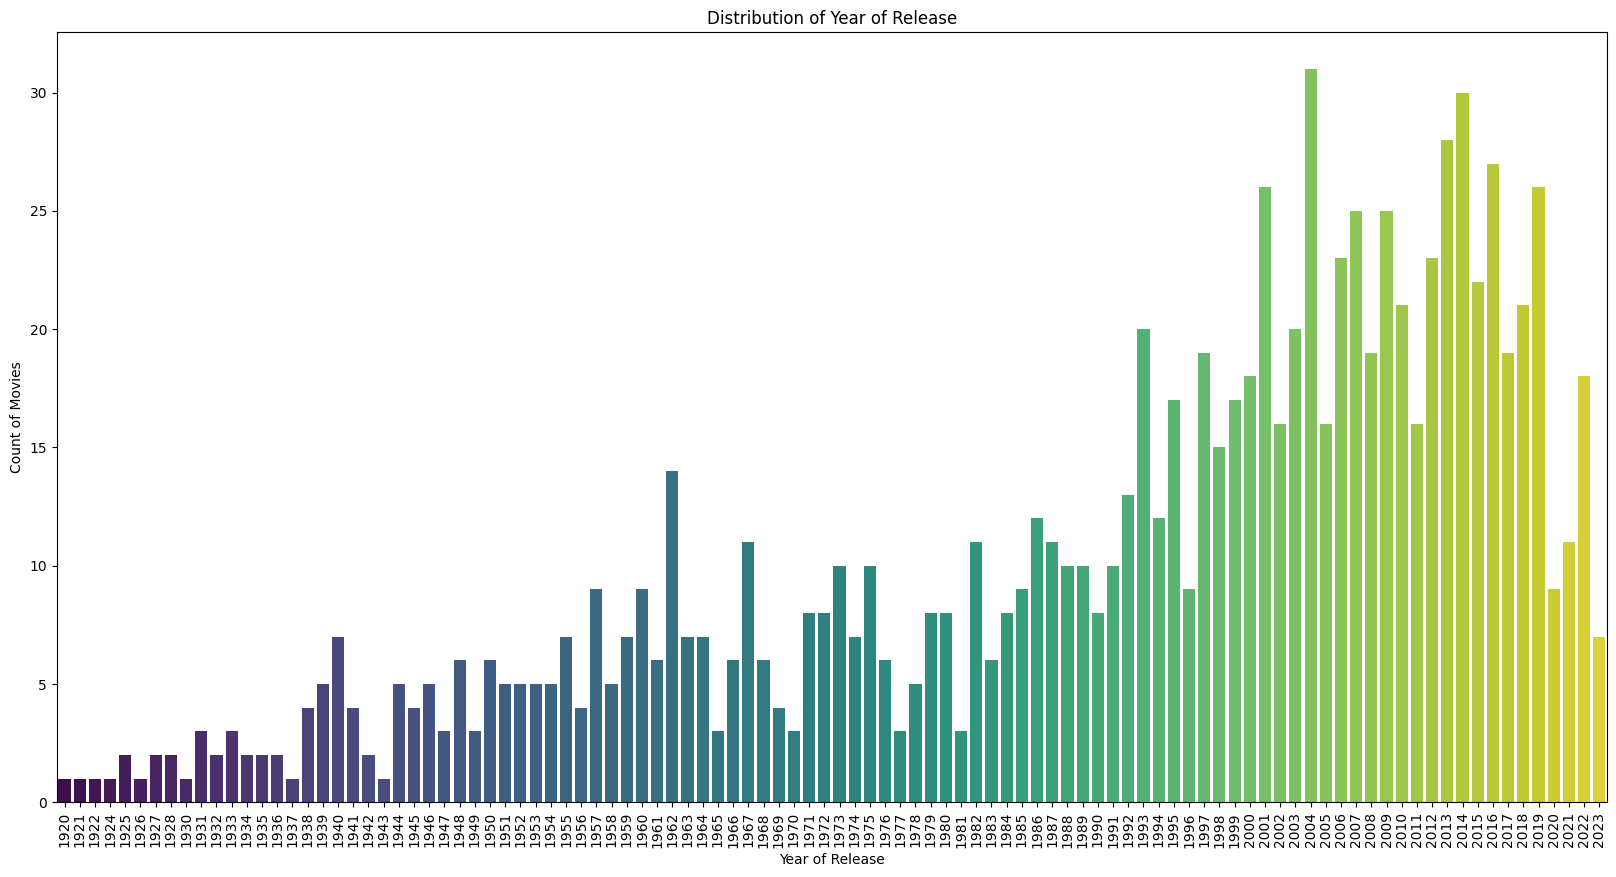

In [33]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Year_of_release', palette='viridis')
plt.xlabel('Year of Release')
plt.ylabel('Count of Movies')
plt.title('Distribution of Year of Release')
plt.xticks(rotation=90)
plt.show()



**Inference**



*   It shows our dataset consists of the highest no. of movies in year 2004
*   Only 1 movie in year 1920 , 1921 , 1922 each





To find in which year the movie has the highest Metascore, we can create a bar plot with years on the x-axis and the mean Metascore for each year on the y-axis. This will show us the average Metascore for each year and help identify the year with the highest Metascore.

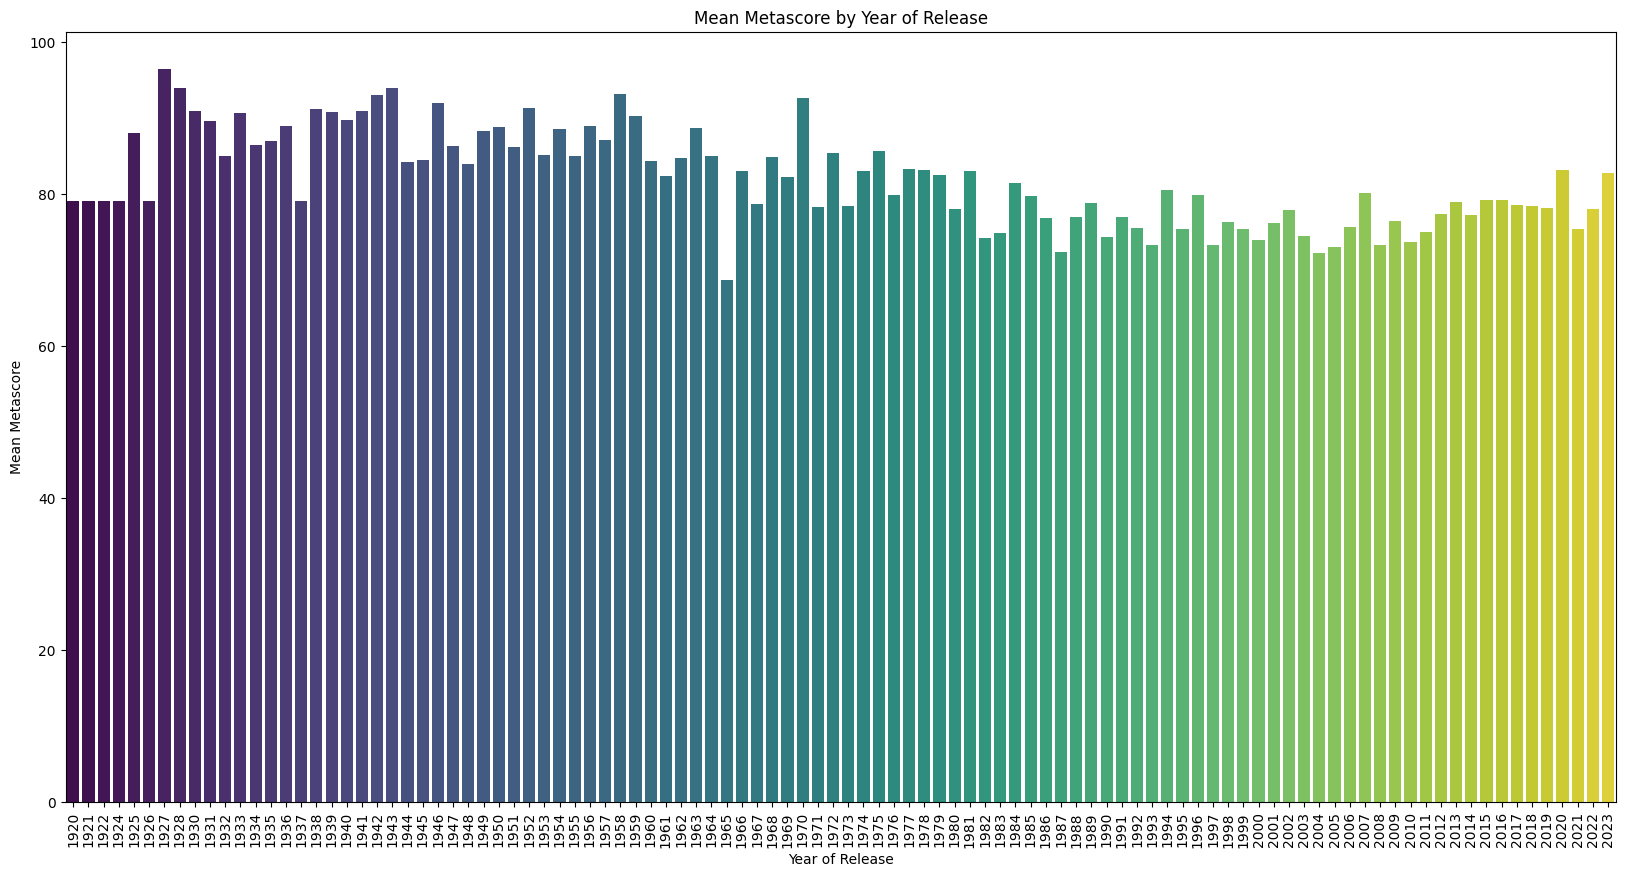

In [34]:
# Group the data by 'Year_of_release' and calculate the mean Metascore for each year
metascore_by_year = df.groupby('Year_of_release')['Metascore'].mean().reset_index()

# Create a bar plot to visualize the mean Metascore for each year
plt.figure(figsize=(20, 10))
sns.barplot(data=metascore_by_year, x='Year_of_release', y='Metascore', palette='viridis')
plt.xlabel('Year of Release')
plt.ylabel('Mean Metascore')
plt.title('Mean Metascore by Year of Release')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

1927 is the year with the movies consisting of highest Metascore

Now in order to understand the distribution of Votes we will plot a histogram

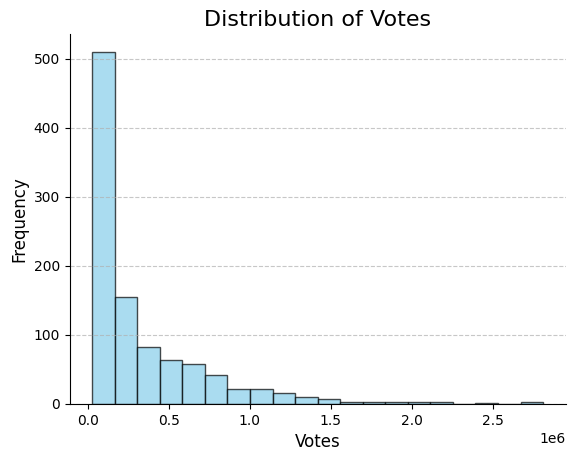

In [35]:
# Create a figure and axis
fig, ax = plt.subplots()

# Set a custom color for the bars
color = 'skyblue'

# Plot the histogram
ax.hist(df['Votes'], bins=20, color=color, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Votes', fontsize=16)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()


**Insight**

It shows that in our dataset Movies having votes between 0.1 to 0.8 are the highest and even the movies with votes greater than 1.5 which are considered as good are also there so it shows that we have Votes of every variety in our dataset. This is Positively Skewed which shows most of the data lies on the left tail of the graph

In the same way we can go for Movie_rating distribution in our dataset to check whether our dataset is biased or not

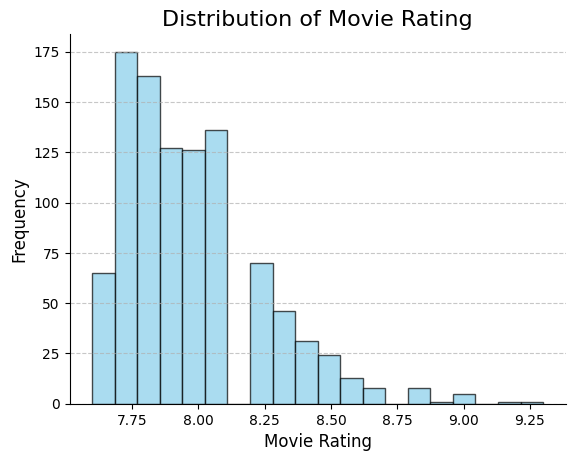

In [36]:
# Create a figure and axis
fig, ax = plt.subplots()

# Set a custom color for the bars
color = 'skyblue'

# Plot the histogram
ax.hist(df['Movie_Rating'], bins=20, color=color, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Movie Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Movie Rating', fontsize=16)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

**Insight**


So we can see that movies with Movie Rating are greater than 5 . So it justifies that we have scraped top 1000 IMDB movies and our dataset is more concentrated towards good Movies . This is also positively Skewed

Now in order to visualize the summary statistics (median, quartiles, and outliers) of Movie_Rating we can plot a Box Plot

Quartiles (Q1, Median, Q3): 7.8 7.9 8.1


Lower Bound is:  7.35


Upper Bound is:  8.549999999999999


Potential Outliers:
 0     9.3
1     9.2
2     9.0
3     9.0
4     9.0
5     9.0
6     9.0
7     8.9
8     8.8
9     8.8
10    8.8
11    8.8
12    8.8
13    8.8
14    8.8
15    8.8
16    8.7
17    8.7
18    8.7
19    8.7
20    8.7
21    8.7
22    8.7
23    8.7
24    8.6
25    8.6
26    8.6
27    8.6
28    8.6
29    8.6
30    8.6
31    8.6
32    8.6
33    8.6
34    8.6
35    8.6
36    8.6
Name: Movie_Rating, dtype: float64


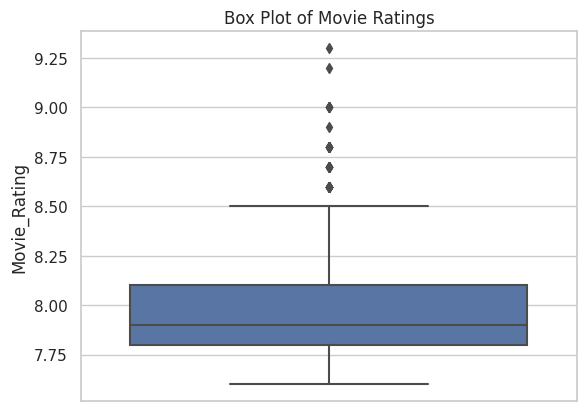

In [37]:
# Create a box plot
sns.set(style="whitegrid")
ax = sns.boxplot(y='Movie_Rating', data=df)

# Calculate statistical values
quartiles = df['Movie_Rating'].quantile([0.25, 0.5, 0.75])
median = quartiles[0.5]
q1 = quartiles[0.25]
q3 = quartiles[0.75]

# Find potential outliers
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


# Print the statistical measures and outliers
print("Quartiles (Q1, Median, Q3):", q1, median, q3)
print("\n")
print("Lower Bound is: ",lower_bound)
print("\n")
print("Upper Bound is: ",upper_bound)
print("\n")
outliers = df[(df['Movie_Rating'] < lower_bound) | (df['Movie_Rating'] > upper_bound)]
print("Potential Outliers:\n", outliers['Movie_Rating'])


# Add a title
plt.title('Box Plot of Movie Ratings')
plt.show()


















We can see from the box plot for Movie_Rating:


*   There are total 7 Outliers
*   Highest Movie Rating is 9.3


*   Q1 = 7.8
*   Median = 7.9


*   Q3 = 8.1
*   Movie rating > 8.54 and < 7.35 are considered as Ouliers







Now I want to see the name of the movie which has the highest Movie Rating 9.3

In [38]:
# Filter the DataFrame for outliers with a Movie Rating of 9.3
outliers = df[df['Movie_Rating'] == 9.3]

# Get the name of the movie with the highest Movie Rating among outliers
highest_rated_outlier_movie = outliers[outliers['Movie_Rating'] == outliers['Movie_Rating'].max()]

# Print the name of the movie
movie_name = highest_rated_outlier_movie['Name_of_movie'].values[0]
print("Movie with the highest Movie Rating (outlier):", movie_name)


Movie with the highest Movie Rating (outlier): The Shawshank Redemption


In [39]:
# Sort the DataFrame by Movie Rating in ascending order
lowest_rated_movie = df.sort_values(by='Movie_Rating').iloc[0]

# Print the name of the movie
movie_name = lowest_rated_movie['Name_of_movie']
print("Movie with the lowest movie rating (overall dataset):", movie_name)


Movie with the lowest movie rating (overall dataset): Cell 211


Now we want to explore the relationship between Metascore (which is given before the release of Movie) and Votes ( which are the response from watchers).So we need to do Bivariate Analysis using SCATTER PLOT

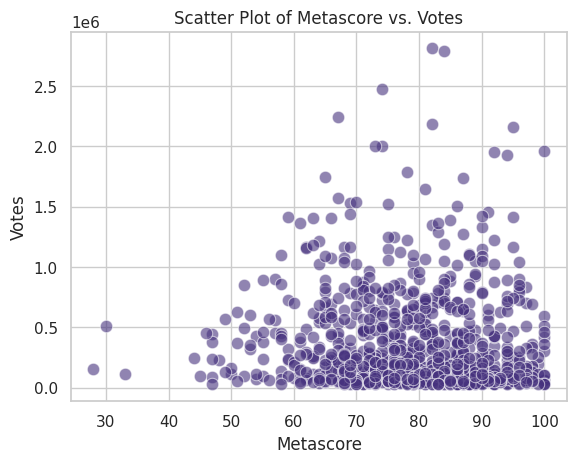

In [40]:


# Set a custom color palette
sns.set_palette("viridis")

# Create the scatter plot
sns.scatterplot(x='Metascore', y='Votes', data=df, marker='o', s=80, alpha=0.6)

# Add labels to the axes
plt.xlabel('Metascore')
plt.ylabel('Votes')

# Set the title
plt.title('Scatter Plot of Metascore vs. Votes')

# Show the plot
plt.show()


So it shows that More the Meta score more will be the Votes are  less negatively correlated which also justifies our heat map where are correlation was -0.0675 i.e they are less positively correlated there are some movies where votes increases with Metascore while majority of movies have more Metascore but less Votes

Now we want to explore one of our target variables 'Metascore'

Quartiles (Q1, Median, Q3): 73.0 79.08165680473373 86.0


Lower Bound is:  53.5


Upper Bound is:  105.5


Potential Outliers:
 414    47.0
433    33.0
487    49.0
514    47.0
555    50.0
604    51.0
612    53.0
613    47.0
625    50.0
631    48.0
647    51.0
661    49.0
770    47.0
811    44.0
825    47.0
843    45.0
854    52.0
868    53.0
913    51.0
935    46.0
943    52.0
944    52.0
959    30.0
977    53.0
990    28.0
Name: Metascore, dtype: float64
Potential Outliers:
 25


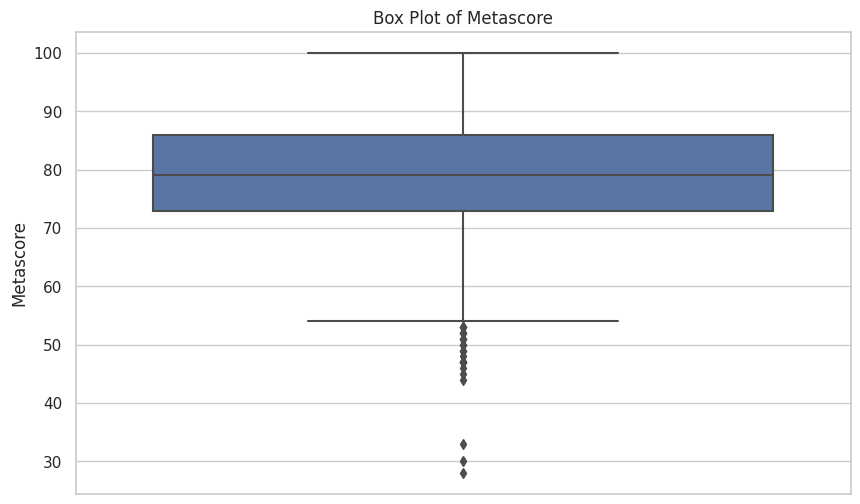

In [41]:
# Set the figure size
plt.figure(figsize=(10, 6))
# Create a box plot
sns.set(style="whitegrid")
ax = sns.boxplot(y='Metascore', data=df)

# Calculate statistical values
quartiles = df['Metascore'].quantile([0.25, 0.5, 0.75])
median = quartiles[0.5]
q1 = quartiles[0.25]
q3 = quartiles[0.75]

# Find potential outliers
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


# Print the statistical measures and outliers
print("Quartiles (Q1, Median, Q3):", q1, median, q3)
print("\n")
print("Lower Bound is: ",lower_bound)
print("\n")
print("Upper Bound is: ",upper_bound)
print("\n")
outliers = df[(df['Metascore'] < lower_bound) | (df['Metascore'] > upper_bound)]
print("Potential Outliers:\n", (outliers['Metascore']))
print("Potential Outliers:\n", len(outliers['Metascore']))

# Add a title
plt.title('Box Plot of Metascore')
plt.show()


**Inferences**

We can see from the box plot for Metascore:


*   There are total 25 potential Outliers
*   Lowest Metascore is 7.9702


*   Q1 = 73.0
*   Median = 79.081


*   Q3 = 86.0
*   Movie rating > 105.5 and < 53.5 are considered as Ouliers

Although we got the Statiscal Measures of Metascore but we should know about the distribution of Metascore

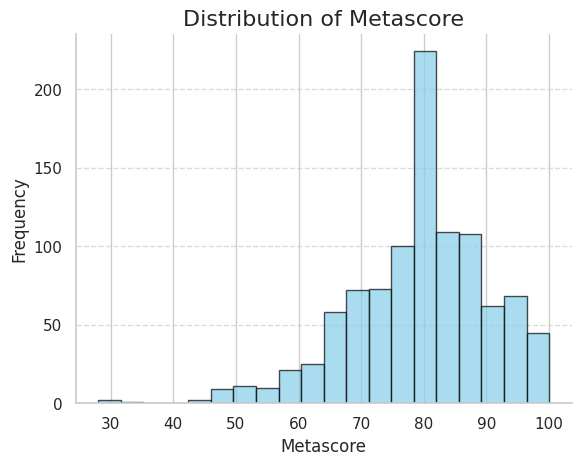

In [42]:
# Create a figure and axis
fig, ax = plt.subplots()

# Set a custom color for the bars
color = 'skyblue'

# Plot the histogram
ax.hist(df['Metascore'], bins=20, color=color, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Metascore', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Metascore', fontsize=16)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

This is a Negatively skewed Graph most of the data is concentrated on the right tail of the graph

In [43]:
# Filter the DataFrame for movies with a specific 'Metascore' value
outliers = df[df['Metascore'] == 28.0]

# Check if there are any movies in the DataFrame
if not outliers.empty:
    # Find the movie with the lowest 'Metascore' among the filtered movies
    lowest_rated_outlier_movie = outliers[outliers['Metascore'] == outliers['Metascore'].min()]

    # Check if there is a movie with the lowest 'Movie Rating'
    if not lowest_rated_outlier_movie.empty:
        movie_name = lowest_rated_outlier_movie['Name_of_movie'].values[0]
        print("Movie with the lowest Metascore (outlier):", movie_name)
    else:
        print("No movie has the lowest Metascore among the outliers.")
else:
    print("No movies with the specified Metascore were found.")



Movie with the lowest Metascore (outlier): I Am Sam


In [44]:
# Sort the DataFrame by Metascore in descending order to find the highest Metascore
highest_metascore_movie = df.sort_values(by='Metascore', ascending=False).iloc[0]

# Print the name of the movie
movie_name = highest_metascore_movie['Name_of_movie']
print("Movie with the highest Metascore (overall dataset):", movie_name)


Movie with the highest Metascore (overall dataset): Vertigo


----
# **MACHINE LEARNING MODEL**

----


Now we are done with Numerical data Values but we have Object type variables also so our STRATEGY of making a machine learning model will consists of these points:


*   We will Take the Important Columns of Object Datatype like 'Director' and 'Stars' with the selected Numerical datatype columns.  
*   Since a ML model can work with only Numerical Columns so we have to do the **Label Encoding**

*   It will be used to convert the object datatype to a numerical datatype.


*   After that we will standardize the data in order to look after the accuracy
*   Then we are going to use Random Forest Classifier which was the best fitted
regressor model in our project











**LABEL ENCODING**

In [45]:
# converting column to numerical datatype

df['Director'] = df['Director'].astype('category')
df['Stars	'] = df['Stars'].astype('category')


In [46]:
# Select columns with data type 'category'
cat_columns = df.select_dtypes(['category']).columns

# Apply label encoding to each categorical column
for column in cat_columns:
    df[column] = df[column].cat.codes

df[column] = df[column].cat.codes

Inside the loop, this line applies label encoding to each categorical column. df[column] accesses the specific column we are currently iterating through. df[column].cat accesses the categorical attributes of the column, and .codes is used to obtain the numeric codes associated with each unique category in that column.

In [47]:
df.head()

,Name_of_movie,Year_of_release,Movie_Rating,Metascore,Votes,Grosses,Director,Stars,Stars\t
0,The Shawshank Redemption,1994,9.3,82.0,2811733,28.34,199,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",891
1,The Godfather,1972,9.2,100.0,1959532,134.97,197,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",636
2,The Dark Knight,2008,9.0,84.0,2793415,534.86,73,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",198
3,Schindler's List,1993,9.0,95.0,1413454,96.90,507,"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...",600
4,The Lord of the Rings: The Return of the King,2003,9.0,94.0,1925087,377.85,426,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",301


---



**RANDOM FOREST REGRESSOR**

---






**What is Random Forest Regressor**

A Random Forest Regressor is a machine learning algorithm that is used for regression tasks. It's an ensemble learning method, meaning it combines the predictions of multiple individual models (in this case, decision trees) to make more accurate and robust predictions. Random Forest is particularly useful for handling complex regression problems and is known for its high predictive accuracy and resistance to overfitting.

- It's designed for predicting a continuous numerical value or quantity.
  
- It's commonly used for tasks like predicting stock prices, housing prices, or any problem where you want to estimate a numerical value.
- The outcome is a real-valued number.


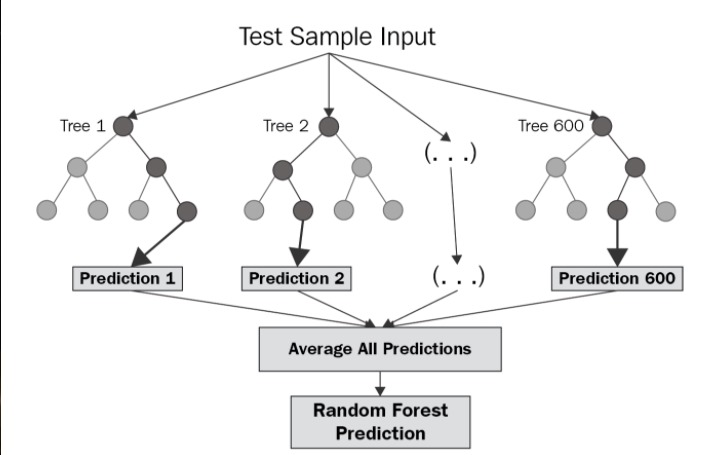

**Splitting of the Variables**


Now in this, we have input variables X consisting of Stars, Votes, Director and Metascore and we are going to create a Target Variable Y that isGrosses which will be the prediction.

In [48]:
# Now, you can create the 'X' and 'y' variables
X = df[['Stars\t', 'Votes', 'Director', 'Metascore']]  # Features
y = df['Grosses']  # Target variable

Now we are going to use train_test_split` from scikit-learn to divide a dataset (`X` and `Y`) into training (80%) and testing (20%) subsets for machine learning, with a random seed of 42.

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**StandardScaler**

Standardization scales the data to have a mean of 0 and a standard deviation of 1, making it suitable for many machine learning algorithms.

The standard score of a sample x is calculated as:

z = (x - u) / s

breaks down as follows:

z: This is the standardized value of a sample also known as z score.

x: This is the original value of a sample.

u: This is the mean (average) of the feature across all samples in the dataset.

s: This is the standard deviation of the feature across all samples in the dataset.

Now we are going to initialize a `StandardScaler` to standardize the training data (`X_train`) and then applies the same transformation to the testing data (`X_test`).

In [50]:
# Create and fit a StandardScaler to standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

Now we are taking the user input and standardizing them for the further predictions

In [52]:
# Standardize the user inputs
stars = 405
votes = 1925678
directors = 60
metascore = 87
user_input = scaler.transform([[stars, votes, directors, metascore]])

In [53]:

# Make predictions using user inputs on the scaled data
prediction = model.predict(user_input)

As we can see that our model is ready but since it is a regression model so we need to take out the errors lke MAE , MSE , RMSE and R-squared to know the reliablity of our model

In [54]:

# Evaluate the model performance on the test set using the scaled test data
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [55]:

print("Mean Absolute Error (MAE) on Test Set:", mae)
print("Mean Squared Error (MSE) on Test Set:", mse)
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)
print("R-squared (R2) on Test Set:", r2)


Mean Absolute Error (MAE) on Test Set: 51.893021
Mean Squared Error (MSE) on Test Set: 8129.0522382954
Root Mean Squared Error (RMSE) on Test Set: 90.16125685845002
R-squared (R2) on Test Set: 0.2800275027726923


In [56]:
# Format the prediction to display as "$xxx.xxM"
formatted_prediction = f"${prediction[0]:.2f}M"

print("Estimated Box Office Earnings:", formatted_prediction)

Estimated Box Office Earnings: $220.37M
